# Exploring ebay Car Sales in Germany.

By working with the ebay car sales data, scraped from *eBay Kleinanzeigen*, a classifieds section of the German eBay website, we aim to clean the data and analyze the included used car listings.

The **data dictionary** provided with data is as follows:

**1. dateCrawled** - When this ad was first crawled. All field-values are taken from this date.

**2. name** - Name of the car.
seller - Whether the seller is private or a dealer.

**3. offerType** - The type of listing

**4. price** - The price on the ad to sell the car.

**5. abtest** - Whether the listing is included in an A/B test.

**6. vehicleType**- The vehicle Type.

**7. yearOfRegistration** - The year in which the car was first registered.

**8. gearbox** - The transmission type.

**9. powerPS**- The power of the car in PS.

**10. model** - The car model name.

**11. kilometer** - How many kilometers the car has driven.

**12. monthOfRegistration** - The month in which the car was first registered.

**13. fuelType** - What type of fuel the car uses.

**14. brand** - The brand of the car.

**15. notRepairedDamage** - If the car has a damage which is not yet repaired.

**16. dateCreated** - The date on which the eBay listing was created.

**17. nrOfPictures** - The number of pictures in the ad.

**18. postalCode** - The postal code for the location of the vehicle.

**18. lastSeenOnline** - When the crawler saw this ad last online.

Let us start by importing the dataset.

In [1]:
import pandas as pd
data=pd.read_csv("autos.csv",encoding="Latin-1")

In [2]:
#First few rows of the dataset.
data[:5]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

We can see that there are multiple columns with null values and multiple columns with "object" as datatype. Let us start our data cleaning here.

## Data Cleaning

### 1. Null Values

Looking at the results above, lets us know that columns **vehicleType,gearbox,model,fuelType and notRepairedDamage** have some null values. The way to handle this missing data depends on the percentage of observations missing from each column.

In [4]:
def per_missing(col): #function to calculate percentage of missing values
    per=(data[col].isnull().sum()*100)/data.shape[0]
    print("Percentage of ",col," missing is: ",per,"%")
per_missing("vehicleType")
per_missing("gearbox")
per_missing("model")
per_missing("fuelType")
per_missing("notRepairedDamage")

Percentage of  vehicleType  missing is:  10.19 %
Percentage of  gearbox  missing is:  5.36 %
Percentage of  model  missing is:  5.516 %
Percentage of  fuelType  missing is:  8.964 %
Percentage of  notRepairedDamage  missing is:  19.658 %


As at most, the column missing values are **20%** of the data,we won't be dealing with missing data now and proceed further

### 2. Ambiguous Column Names and Values

Let us see the column names.

In [5]:
print(data.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


Some of the column names are too long like **'yearOfRegistration',  'monthOfRegistration'** and **'notRepairedDamage'** Some of them are inappropriate like **'dateCreated'** which is the date on which the eBay listing was created.
Also let us change the camelcase of the column names to snakecase.

We will make the following changes:
1. yearOfRegistration to registration_year
2. monthOfRegistration to registration_month
3. notRepairedDamage to unrepaired_damage
4. dateCreated to ad_created
5. nrOfPictures to num_pics
6. The rest of the column names from camelcase to snakecase.

In [6]:
data.rename({"yearOfRegistration":"registration_year","monthOfRegistration":"registration_month",
            "notRepairedDamage":"unrepaired_damage","dateCreated":"ad_created",
            "dateCrawled":"date_crawled","offerType":"offer_type","powerPS":"power_ps",
            "nrOfPictures":"num_pics","fuelType":"fuel_type","postalCode":"postal_code",
            "postalCode":"postal_code",'vehicleType':'vehicle_type',"lastSeen":"last_seen"},inplace=True,axis=1)

In [7]:
print(data.columns)

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_pics', 'postal_code',
       'last_seen'],
      dtype='object')


#### 2. Exploring column values for ambiguous values

##### a) Removing rows with values that are inappropriate.

In [8]:
data["registration_month"].value_counts()

0     5075
3     5071
6     4368
5     4107
4     4102
7     3949
10    3651
12    3447
9     3389
11    3360
1     3282
8     3191
2     3008
Name: registration_month, dtype: int64

Let us remove the values with registration_month=0 because this value seems ambiguous

In [9]:
data=data[~(data["registration_month"]==0)]

The acceptable values for registration year are 1900-2016. So we will remove all other rows with values that do not fall in this interval.

In [10]:
data=data[~((data["registration_year"]>2016)|(data["registration_year"]<1900))]

data.shape

(43441, 20)

##### b) Changing german words to english words.

In [11]:
data["seller"].unique()

array(['privat', 'gewerblich'], dtype=object)

In german, privat means private and gewerblich means commercial.

In [12]:
ger_eng={'privat':"private","gewerblich":"commercial"}
data["seller"]=data["seller"].map(ger_eng)
data["seller"].unique()

array(['private', 'commercial'], dtype=object)

In [13]:
data["offer_type"].unique()

array(['Angebot'], dtype=object)

In german, Angebot means offer.

In [14]:
ger_eng={'Angebot':"offer"}
data["offer_type"]=data["offer_type"].map(ger_eng)
data["offer_type"].unique()

array(['offer'], dtype=object)

In [15]:
data["gearbox"].unique()

array(['manuell', 'automatik', nan], dtype=object)

In german, manuell means manual and automatik means automatic .

In [16]:
ger_eng={'manuell':"manual","automatik":"automatic"}
data["gearbox"]=data["gearbox"].map(ger_eng)
data["gearbox"].unique()

array(['manual', 'automatic', nan], dtype=object)

In [17]:
data["fuel_type"].unique()

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

In german, benzin means petrol and elektro means electro.

In [18]:
ger_eng={"andere":"others", "benzin":"gasoline","cng":"cng", "diesel":"diesel", 
                "elektro":"electric", "hybrid":"hybrid", "lpg":"lpg"}
data["fuel_type"]=data["fuel_type"].map(ger_eng)
data["fuel_type"].unique()

array(['lpg', 'gasoline', 'diesel', nan, 'cng', 'hybrid', 'electric',
       'others'], dtype=object)

In [19]:
data["vehicle_type"].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [20]:
ger_eng={"andere":"others","bus":"bus","kleinewagen":"small_car","kombi":"combi","cabrios":"convertible",
         "coupe":"coupe","suv":"suv","limousine":"limousine"}

data["vehicle_type"]=data["vehicle_type"].map(ger_eng)
data["vehicle_type"].unique()

array(['bus', 'limousine', nan, 'combi', 'coupe', 'suv', 'others'],
      dtype=object)

In [21]:
data["unrepaired_damage"].unique()

array(['nein', nan, 'ja'], dtype=object)

In [22]:
data["unrepaired_damage"]=data["unrepaired_damage"].map({"ja":"yes", "nein":"no"})
data["unrepaired_damage"].unique()

array(['no', nan, 'yes'], dtype=object)

### 3. Exploring data types

In [23]:
data.dtypes

date_crawled          object
name                  object
seller                object
offer_type            object
price                 object
abtest                object
vehicle_type          object
registration_year      int64
gearbox               object
power_ps               int64
model                 object
odometer              object
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
num_pics               int64
postal_code            int64
last_seen             object
dtype: object

The data types of some columns seems wrong.

| Column | Wrong Data Type | Correct Data Type |
| --- | --- | --- |
| date_crawled | Object | datetime |
| price | Object | float |
| ad_created | Object | datetime |
| last_seen | Object | datetime |
| odometer | Object | float |

Also, km suffix should be removed from the **odometer** column and then it will be converted to int.
Also, from the **price** column,$ prefix should be removed and then it will be converted to float.

##### a) Removing inappropriate suffix/prefix from price and odometer data.

In [24]:
data["price"]=data["price"].str.replace("$","")
data["price"]=data["price"].str.replace(",","")
data["price"]

0         5000
1         8500
2         8990
3         4350
4         1350
         ...  
49995    24900
49996     1980
49997    13200
49998    22900
49999     1250
Name: price, Length: 43441, dtype: object

In [25]:
data["odometer"]=data["odometer"].str.replace("km","")
data["odometer"]=data["odometer"].str.replace(",","")
data["odometer"]

0        150000
1        150000
2         70000
3         70000
4        150000
          ...  
49995    100000
49996    150000
49997      5000
49998     40000
49999    150000
Name: odometer, Length: 43441, dtype: object

Let us also alter the column names to make them more descriptive.

In [26]:
data.rename({"price":"price($)","odometer":"odometer(km)"},inplace=True,axis=1)
data.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price($)', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer(km)', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_pics', 'postal_code',
       'last_seen'],
      dtype='object')

##### b) Changing the data types of the columns mentioned above.

In [27]:
data["date_crawled"]=pd.to_datetime(data["date_crawled"])
data["ad_created"]=pd.to_datetime(data["ad_created"])
data["last_seen"]=pd.to_datetime(data["last_seen"])


In [28]:
data["price($)"]=data["price($)"].astype("float")
data["odometer(km)"]=data["odometer(km)"].astype("float")

In [29]:
data.dtypes

date_crawled          datetime64[ns]
name                          object
seller                        object
offer_type                    object
price($)                     float64
abtest                        object
vehicle_type                  object
registration_year              int64
gearbox                       object
power_ps                       int64
model                         object
odometer(km)                 float64
registration_month             int64
fuel_type                     object
brand                         object
unrepaired_damage             object
ad_created            datetime64[ns]
num_pics                       int64
postal_code                    int64
last_seen             datetime64[ns]
dtype: object

In [30]:
data["offer_type"].unique()


array(['offer'], dtype=object)

In [31]:
data["num_pics"].unique()

array([0])

offer_type and num_pics have same value across all rows. There is no benefit in keeping these columns in our analysis as they have redundant values

In [32]:
data.drop(["offer_type","num_pics"],axis=1,inplace=True)
data

,date_crawled,name,seller,price($),abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer(km),registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,private,5000.0,control,bus,2004,manual,158,andere,150000.0,3,lpg,peugeot,no,2016-03-26,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,private,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,gasoline,bmw,no,2016-04-04,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,private,8990.0,test,limousine,2009,manual,102,golf,70000.0,7,gasoline,volkswagen,no,2016-03-26,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,private,4350.0,control,NaN,2007,automatic,71,fortwo,70000.0,6,gasoline,smart,no,2016-03-12,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,private,1350.0,test,combi,2003,manual,0,focus,150000.0,7,gasoline,ford,no,2016-04-01,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,private,24900.0,control,limousine,2011,automatic,239,q5,100000.0,1,diesel,audi,no,2016-03-27,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,private,1980.0,control,NaN,1996,manual,75,astra,150000.0,5,gasoline,opel,no,2016-03-28,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,private,13200.0,test,NaN,2014,automatic,69,500,5000.0,11,gasoline,fiat,no,2016-04-02,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,private,22900.0,control,combi,2013,manual,150,a3,40000.0,11,diesel,audi,no,2016-03-08,35683,2016-04-05 16:45:07


Data cleaning seems over (as of now). Let us proceed to our analysis.

## Analysis

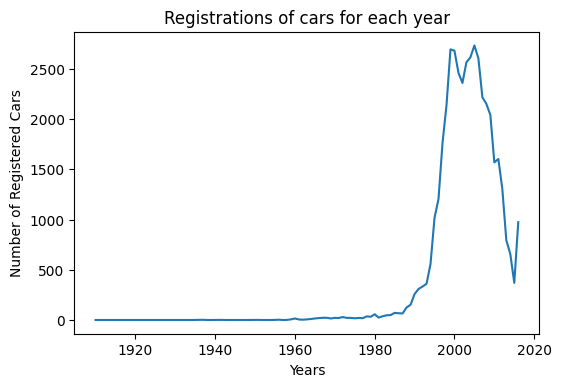

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
reg_year_count=data["registration_year"].value_counts().sort_index()
plt.plot(reg_year_count)
plt.xlabel("Years")
plt.ylabel("Number of Registered Cars")
plt.title("Registrations of cars for each year")
plt.show()

During years 1920-1980, the registered cars are too low. Let us just focus on years after 1980 as they are more relevant to our analysis.

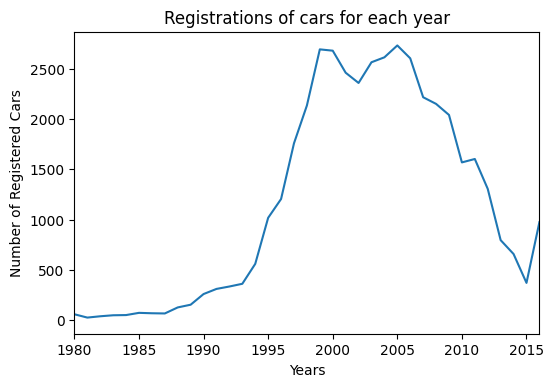

In [35]:
plt.plot(reg_year_count)
plt.xlim([1980, 2016])
plt.xlabel("Years")
plt.ylabel("Number of Registered Cars")
plt.title("Registrations of cars for each year")
plt.show()

Most number of vehicles on the listings were registered in the years 2000-2010.

Let's break this data by **vehicle type.**

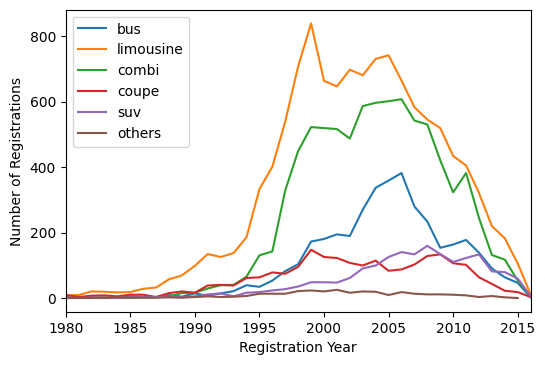

In [37]:
for v in data["vehicle_type"].dropna().unique():
    vt=(data["vehicle_type"]==v)
    a=data.loc[vt,"registration_year"].value_counts(dropna=True).sort_index()
    plt.plot(a.index,a.values,label=v)
    plt.xlim(1980,2016)
    
plt.xlabel("Registration Year")    
plt.ylabel("Number of Registrations")    
plt.legend()
plt.show()


Breaking down the data into vehicle types, showed us that most **limousines, combi and buses** were registered during **2000-2010** as shown in the previous figure but for other categories, the registration peaks were seen during different time frames.

Now we will look at each vehicle type individually and see what **brands** are common in the listings.

##### 

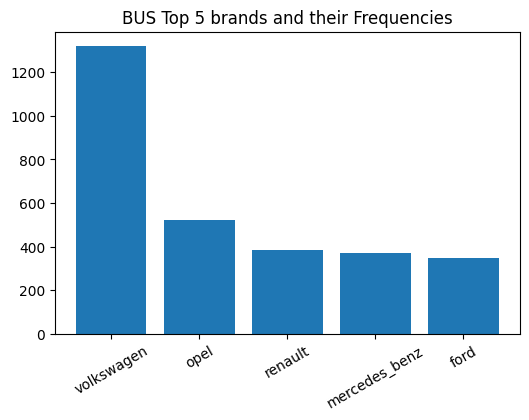

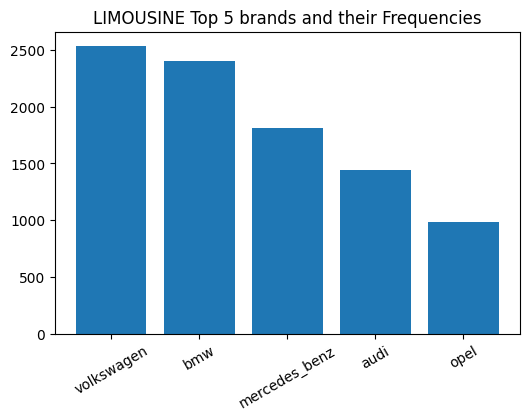

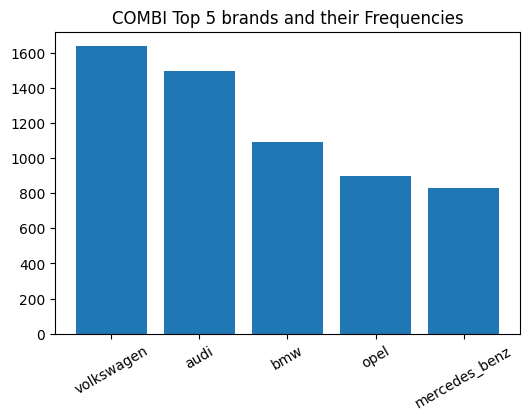

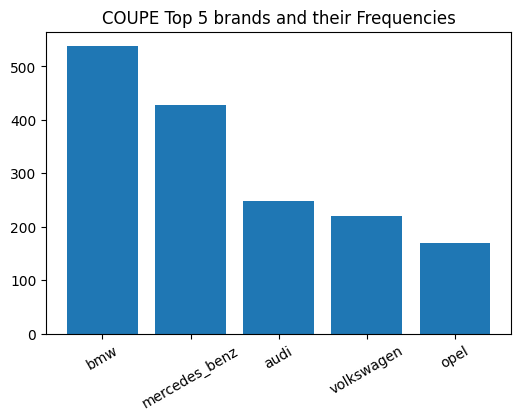

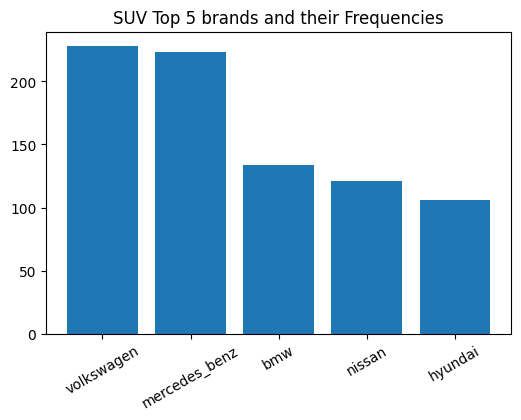

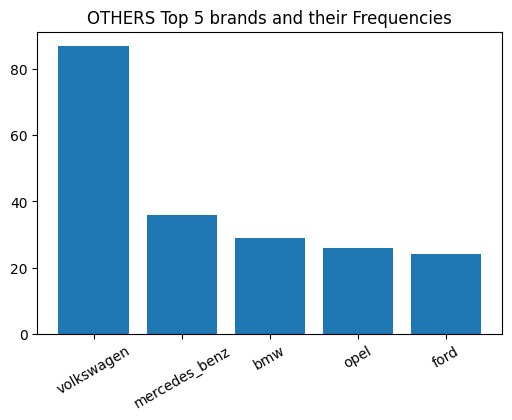

In [112]:
for v in data["vehicle_type"].dropna().unique():
    
    vt=data["vehicle_type"]==v
    c=data.loc[vt,"brand"].value_counts().sort_values(ascending=False).head(5)
    plt.bar(c.index,c.values)
    plt.xticks(rotation=30)
    plt.title(v.upper()+" Top 5 brands and their Frequencies")
    plt.show()

For most vehicle types, the listings seem to show similar top 5 brands like **Volkswagen, Audi, BMW, Opel and Mercedes Benz.**
Now, we will focus some of our analysis on these common brands.


In [83]:
popular_brands=["volkswagen","audi","bmw","mercedes_benz","opel"]

Let us compare the average prices of these common brands for used vehicles

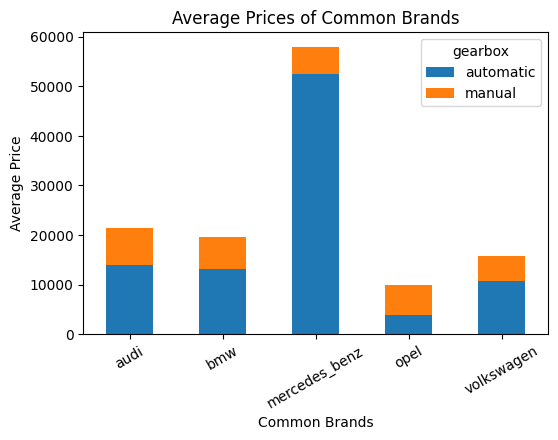

In [114]:
v=(data["brand"].isin(popular_brands))
a=data[v].groupby(["brand","gearbox"])["price($)"].mean().unstack("gearbox")
a.plot(kind="bar",stacked=True)
plt.xlabel("Common Brands")
plt.ylabel("Average Price")
plt.xticks(rotation=30)
plt.title("Average Prices of Common Brands")
plt.show()

In common brands, the **most expensive brand seems to be Mercedes Benz** and other brands have comparably low prices.

**In most brands, we see that automatic cars are priced at a higher value than manual cars.
However, only for Opel brand, the reverse is true.**

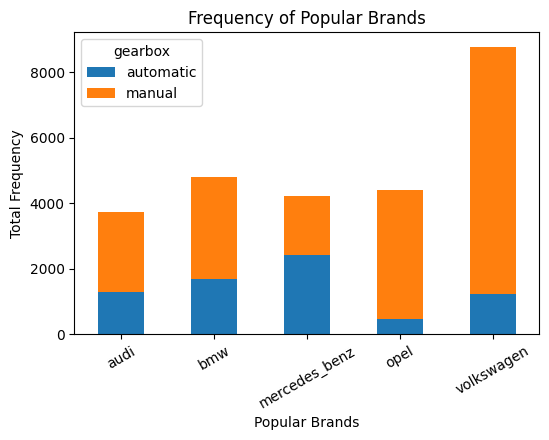

In [42]:
v=(data["brand"].isin(popular_brands))
a=data[v].groupby(["brand","gearbox"])["date_crawled"].count().unstack("gearbox")
a.plot(kind="bar",stacked=True)
plt.xlabel("Popular Brands")
plt.ylabel("Total Frequency")
plt.xticks(rotation=30)
plt.title("Frequency of Popular Brands")
plt.show()

The most common listings seems to be of Volkswagen and the least number of listings are for Audi. In most of these brands,more manual cars are up for sale than automatic cars.

If we compare the prices and frequency of most common brands, we see that on **ebay**, **more number of listings are for cheaper vehicles**.

Let us now compare **odometer(km) i.e. total distance traveled of the common brands.**

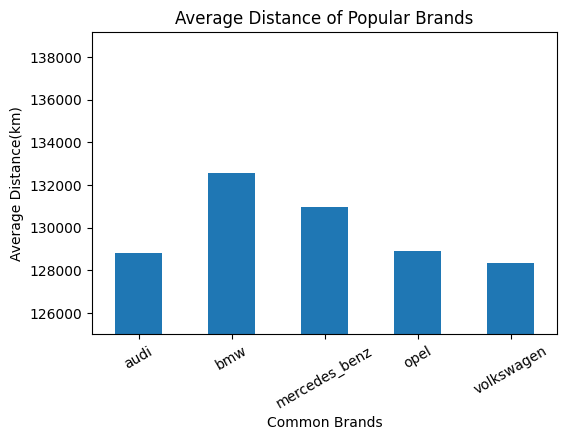

In [116]:
v=(data["brand"].isin(popular_brands))
a=data[v].groupby("brand")["odometer(km)"].mean()
a.plot(kind="bar")
plt.xlabel("Common Brands")
plt.ylabel("Average Distance(km)")
plt.xticks(rotation=30)
plt.ylim(125000,)
plt.title("Average Distance of Popular Brands")
plt.show()


Although the difference in average distance between different brands is not huge but we can use this bar chart to infer that on average, **BMW has most distance traveled.** Maybe, due to this reason, out of the luxury brands (BMW, Audi ,Mercedes), we compared, BMW was cheaper on average.

**Now let us shift some gears(pun intended) and switch our analysis to look at different models for all brands**.
We will look for most common brand/model combinations.

In [124]:
a=data.groupby(["brand","model"]).size().reset_index()
print("Most common Brand/Model combinations:\n")
a.groupby(["brand"])["model",0].max()

Most common Brand/Model combinations:



<ipython-input-124-411635281bf4>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,model,0
brand,,
alfa_romeo,spider,79
audi,tt,1165
bmw,z_reihe,2479
chevrolet,spark,140
chrysler,voyager,44
citroen,c5,194
dacia,sandero,44
daewoo,nubira,22
daihatsu,terios,55


Now, we will look at the difference between prices of **damaged vehicles v/s repaired ones.**

In [117]:
damaged=data[data["unrepaired_damage"]=="yes"]
repaired=data[data["unrepaired_damage"]=="no"]

avg_dam_price=damaged.groupby("brand")["price($)"].mean().sort_values(ascending=False).reset_index()
avg_rep_price=repaired.groupby("brand")["price($)"].mean().sort_values(ascending=False).reset_index()

In [119]:
avg_dam_price.rename({"price($)":"dam_price($)"},inplace=True,axis=1)

avg_rep_price.rename({"price($)":"rep_price($)"},inplace=True,axis=1)

a=pd.merge(avg_rep_price,avg_dam_price,on="brand")
a.set_index(["brand"],inplace=True)
a.head()

,rep_price($),dam_price($)
brand,,
sonstige_autos,66309.358804,6458.937500
porsche,50551.665323,14670.000000
land_rover,21688.512821,5223.750000
jaguar,14055.857143,4438.777778
jeep,12626.000000,3074.875000


<Figure size 600x600 with 0 Axes>

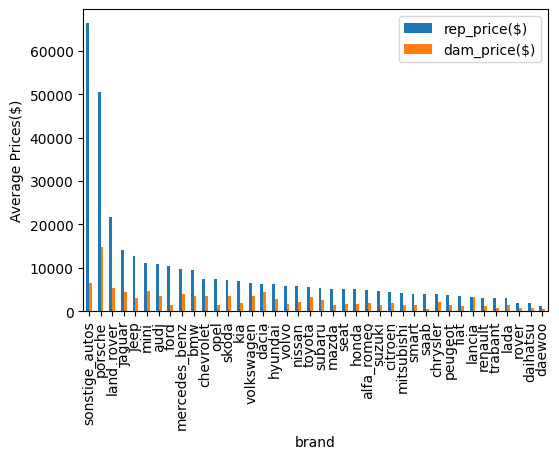

In [122]:
plt.figure(figsize=(6, 6))
a.plot.bar()
plt.ylabel("Average Prices($)")
plt.show()

There is a huge difference between average prices of damaged cars and repaired cars, across all brands. 

This was our apriori expectation as well. Vehicles that are damaged are priced quite low as compared to repaired vehicles.

## Conclusions.

-  Most used cars on ebay were registered during 2000-2010 time frame.


-  The 5 most common brands for different vehicle types were found to be, Volkswagen, Audi, BMW, Opel and Mercedes Benz.


-  In common brands, the most expensive brand seems to be Mercedes Benz and other brands have comparably low prices.Also, mostly,we see that automatic cars are priced at a higher value than manual cars. 


-  The most common listings seems to be of Volkswagen and the least number of listings are for Audi. In each of these brands,more manual cars are up for sale than automatic cars.


-  Using these two bar charts, we saw that on ebay, more number of listings are for cheaper vehicles**.


-  On average, BMW has vehicles with most distance traveled. Maybe, due to this reason, out of the luxury brands (BMW, Audi ,Mercedes), we compared, BMW was cheaper on average.


-  Vehicles that are damaged are priced quite low as compared to repaired vehicles.